# Credit Card Fraud Detection

### Generating Transaction Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
import os
import datetime
import math


In [ ]:
# Step 1 - Generation of customer profiles

def generate_customer_profiles_table(n_customers, random_state=0):

    np.random.seed(random_state)

    customer_id_properties=[]

    # Generate customer properties from random distributions
    for customer_id in range(n_customers):

        latitude = np.random.uniform(-90, 90)  # Latitude ranges from -90 to 90 degrees
        longitude = np.random.uniform(-180, 180)  # Longitude ranges from -180 to 180 degrees

        mean_amount = np.random.uniform(5,10000) # Arbitrary (but sensible) value
        std_amount = mean_amount/2 # Arbitrary (but sensible) value

        mean_nb_tx_per_day = np.random.uniform(0,8) # Arbitrary (but sensible) value

        # add a gender column
        gender = np.random.choice(['F', 'M'])  # Randomly select 'F' or 'M' for gender

        customer_id_properties.append([customer_id,
                                      latitude, longitude,
                                      mean_amount, std_amount,
                                      mean_nb_tx_per_day, gender])

    customer_profiles_table = pd.DataFrame(customer_id_properties, columns=['CUSTOMER_ID',
                                                                      'customer_latitude', 'customer_longitude',
                                                                      'mean_amount', 'std_amount',
                                                                      'mean_nb_tx_per_day', 'GENDER'])

    return customer_profiles_table

In [ ]:
n_customers = 15
customer_profiles_table = generate_customer_profiles_table(n_customers, random_state = 0)
customer_profiles_table

,CUSTOMER_ID,customer_latitude,customer_longitude,mean_amount,std_amount,mean_nb_tx_per_day,GENDER
0,0,8.786431,77.468172,6029.619944,3014.809972,4.359065,M
1,1,22.241465,-41.622585,2978.858392,1489.429196,0.453704,F
2,2,-20.980527,105.021014,5291.304723,2645.652361,4.544356,M
3,3,60.494177,-58.537382,6483.477861,3241.738931,2.945932,M
4,4,50.068215,133.204373,9786.290331,4893.145165,6.393269,M
5,5,3.685946,64.396631,7207.723384,3603.861692,4.656158,M
6,6,80.040405,7.865396,4149.546090,2074.773045,2.116445,M
7,7,42.645272,-102.041872,1356.505643,678.252822,2.593128,M
8,8,20.177230,42.096239,9437.762045,4718.881022,5.454562,F
9,9,20.351422,144.845490,997.307102,498.653551,7.758473,F


In [ ]:
# Step 2 - Generation of terminal profiles

def generate_terminal_profiles_table(n_terminals, random_state=0):

    np.random.seed(random_state)

    terminal_id_properties=[]

    # Generate terminal properties from random distributions
    for terminal_id in range(n_terminals):

        latitude = np.random.uniform(-90, 90)  # Latitude ranges from -90 to 90 degrees
        longitude = np.random.uniform(-180, 180)  # Longitude ranges from -180 to 180 degrees

        terminal_id_properties.append([terminal_id,
                                      latitude, longitude])

    terminal_profiles_table = pd.DataFrame(terminal_id_properties, columns=['TERMINAL_ID',
                                                                      'terminal_latitude', 'terminal_longitude'])

    return terminal_profiles_table

In [ ]:
n_terminals = 15
terminal_profiles_table = generate_terminal_profiles_table(n_terminals, random_state = 0)
terminal_profiles_table

,TERMINAL_ID,terminal_latitude,terminal_longitude
0,0,8.786431,77.468172
1,1,18.497408,16.157946
2,2,-13.742136,52.521881
3,3,-11.234302,141.038280
4,4,83.459297,-41.961053
5,5,52.510507,10.402171
6,6,12.248021,153.214790
7,7,-77.213510,-148.633452
8,8,-86.360688,119.743144
9,9,50.068215,133.204373


In [ ]:
# Step 3 - Association of customer profiles to terminals

def get_list_terminals_within_radius(customer_profile, x_y_terminals, r):

    # Use numpy arrays in the following to speed up computations

    # Location (x,y) of customer as numpy array
    x_y_customer = customer_profile[['customer_latitude','customer_longitude']].values.astype(float)

    # Squared difference in coordinates between customer and terminal locations
    squared_diff_x_y = np.square(x_y_customer - x_y_terminals)

    # Sum along rows and compute suared root to get distance
    dist_x_y = np.sqrt(np.sum(squared_diff_x_y, axis=1))

    # Get the indices of terminals which are at a distance less than r
    available_terminals = list(np.where(dist_x_y<r)[0])

    # Return the list of terminal IDs
    return available_terminals

In [ ]:
# We first get the geographical locations of all terminals as a numpy array
x_y_terminals = terminal_profiles_table[['terminal_latitude','terminal_longitude']].values.astype(float)
# And get the list of terminals within radius of $50$ for the last customer
get_list_terminals_within_radius(customer_profiles_table.iloc[14], x_y_terminals=x_y_terminals, r=50)

[7]

In [ ]:
# Haversine formula implementation
def haversine(lat1, lon1, lat2, lon2):
    # distance between latitudes
    # and longitudes
    dLat = (lat2 - lat1) * math.pi / 180.0
    dLon = (lon2 - lon1) * math.pi / 180.0

    # convert to radians
    lat1 = (lat1) * math.pi / 180.0
    lat2 = (lat2) * math.pi / 180.0

    # apply formula
    a = (pow(math.sin(dLat / 2), 2) +
         pow(math.sin(dLon / 2), 2) *
             math.cos(lat1) * math.cos(lat2));
    rad = 6371
    c = 2 * math.asin(math.sqrt(a))
    return rad * c

In [ ]:
# Alternate Step 3 - use the haversine formula to compute terminals
def get_list_terminals_within_distance(customer_profile, terminals, radius):
  customer_lat = customer_profile['customer_latitude']
  customer_lon = customer_profile['customer_longitude']
  available_terminals = []

  for index in terminals.index:
    terminal_lat = terminals['terminal_latitude'][index]
    terminal_long = terminals['terminal_longitude'][index]
    distance = haversine(customer_lat, customer_lon, terminal_lat, terminal_long)

    if distance <= radius:
      available_terminals.append(terminals['TERMINAL_ID'][index])

  return available_terminals




In [ ]:
# Get the new list of terminals within 4500 km for the last customer
get_list_terminals_within_distance(customer_profiles_table.iloc[14],terminal_profiles_table, 4500)

[7, 8, 13]

In [ ]:
terminal_profiles_table

,TERMINAL_ID,terminal_latitude,terminal_longitude
0,0,8.786431,77.468172
1,1,18.497408,16.157946
2,2,-13.742136,52.521881
3,3,-11.234302,141.038280
4,4,83.459297,-41.961053
5,5,52.510507,10.402171
6,6,12.248021,153.214790
7,7,-77.213510,-148.633452
8,8,-86.360688,119.743144
9,9,50.068215,133.204373


In [ ]:
%%capture

terminals_available_to_customer_fig, ax = plt.subplots(figsize=(5,5))

# Plot locations of terminals
ax.scatter(terminal_profiles_table.terminal_latitude.values,
           terminal_profiles_table.terminal_longitude.values,
           color='blue', label = 'Locations of terminals')

# Plot location of the last customer
customer_id=14
ax.scatter(customer_profiles_table.iloc[customer_id].customer_latitude,
           customer_profiles_table.iloc[customer_id].customer_longitude,
           color='red',label="Location of last customer")

ax.legend(loc = 'upper left', bbox_to_anchor=(1.05, 1))

# Plot the region within a radius of 50 of the last customer
circ = plt.Circle((customer_profiles_table.iloc[customer_id].customer_latitude,
                   customer_profiles_table.iloc[customer_id].customer_longitude), radius=50, color='g', alpha=0.2)
ax.add_patch(circ)

fontsize=15

ax.set_title("Green circle: \n Terminals within a radius of 50 \n of the last customer")
ax.set_xlim([-200, 200])
ax.set_ylim([-300, 300])

ax.set_xlabel('terminal_latitude', fontsize=fontsize)
ax.set_ylabel('temrinal_longitude', fontsize=fontsize)

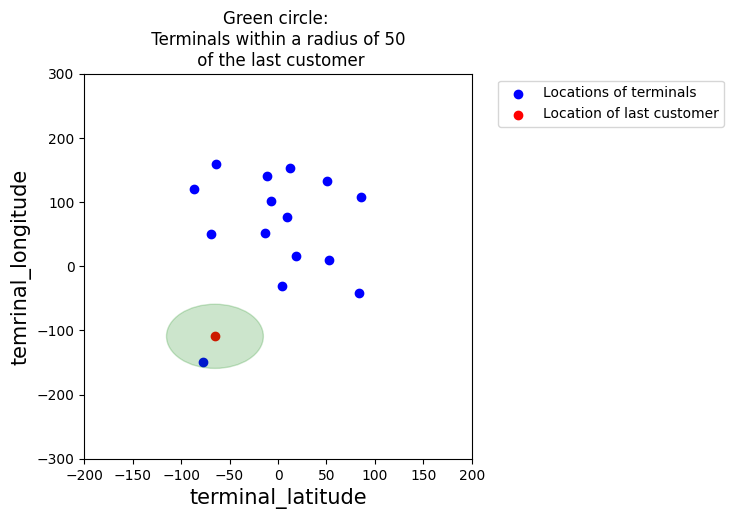

In [ ]:
terminals_available_to_customer_fig

In [ ]:
customer_profiles_table['available_terminals']=customer_profiles_table.apply(lambda x : get_list_terminals_within_distance(x, terminal_profiles_table, 4500), axis=1)
customer_profiles_table

,CUSTOMER_ID,customer_latitude,customer_longitude,mean_amount,std_amount,mean_nb_tx_per_day,GENDER,available_terminals
0,0,8.786431,77.468172,6029.619944,3014.809972,4.359065,M,"[0, 2, 11]"
1,1,22.241465,-41.622585,2978.858392,1489.429196,0.453704,F,[14]
2,2,-20.980527,105.021014,5291.304723,2645.652361,4.544356,M,"[0, 3, 11]"
3,3,60.494177,-58.537382,6483.477861,3241.738931,2.945932,M,"[4, 5, 10]"
4,4,50.068215,133.204373,9786.290331,4893.145165,6.393269,M,"[9, 10]"
5,5,3.685946,64.396631,7207.723384,3603.861692,4.656158,M,"[0, 2, 11]"
6,6,80.040405,7.865396,4149.546090,2074.773045,2.116445,M,"[4, 5, 10]"
7,7,42.645272,-102.041872,1356.505643,678.252822,2.593128,M,[]
8,8,20.177230,42.096239,9437.762045,4718.881022,5.454562,F,"[0, 1, 2]"
9,9,20.351422,144.845490,997.307102,498.653551,7.758473,F,"[3, 6, 9]"


In [ ]:
# Step 4 - Generation of transactions

def generate_transactions_table(customer_profile, start_date = "2022-04-01", nb_days = 30):

    customer_transactions = []

    random.seed(int(customer_profile.CUSTOMER_ID))
    np.random.seed(int(customer_profile.CUSTOMER_ID))

    # For all days
    for day in range(nb_days):

        # Random number of transactions for that day
        nb_tx = np.random.poisson(customer_profile.mean_nb_tx_per_day)

        # If nb_tx positive, let us generate transactions
        if nb_tx>0:

            for tx in range(nb_tx):

                # Time of transaction: Around noon, std 20000 seconds. This choice aims at simulating the fact that
                # most transactions occur during the day.
                time_tx = int(np.random.normal(86400/2, 20000))

                # If transaction time between 0 and 86400, let us keep it, otherwise, let us discard it
                if (time_tx>0) and (time_tx<86400):

                    # Amount is drawn from a normal distribution
                    amount = np.random.normal(customer_profile.mean_amount, customer_profile.std_amount)

                    # If amount negative, draw from a uniform distribution
                    if amount<0:
                        amount = np.random.uniform(0,customer_profile.mean_amount*2)

                    amount=np.round(amount,decimals=2)

                    if len(customer_profile.available_terminals)>0:

                        terminal_id = random.choice(customer_profile.available_terminals)

                        customer_transactions.append([time_tx+day*86400, day,
                                                      customer_profile.CUSTOMER_ID,
                                                      terminal_id, amount])

    customer_transactions = pd.DataFrame(customer_transactions, columns=['TX_TIME_SECONDS', 'TX_TIME_DAYS', 'CUSTOMER_ID', 'TERMINAL_ID', 'TX_AMOUNT'])

    if len(customer_transactions)>0:
        customer_transactions['TX_DATETIME'] = pd.to_datetime(customer_transactions["TX_TIME_SECONDS"], unit='s', origin=start_date)
        customer_transactions=customer_transactions[['TX_DATETIME','CUSTOMER_ID', 'TERMINAL_ID', 'TX_AMOUNT','TX_TIME_SECONDS', 'TX_TIME_DAYS']]

    return customer_transactions

In [ ]:
transaction_table_customer_0=generate_transactions_table(customer_profiles_table.iloc[3],
                                                         start_date = "2022-04-01",
                                                         nb_days = 100)
transaction_table_customer_0

,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS
0,2022-04-01 09:26:39,3,4,6295.71,33999,0
1,2022-04-01 23:32:31,3,10,4534.18,84751,0
2,2022-04-01 17:13:04,3,10,2656.90,61984,0
3,2022-04-01 10:04:13,3,4,6698.40,36253,0
4,2022-04-02 08:53:03,3,5,12380.14,118383,1
...,...,...,...,...,...,...
309,2022-07-08 05:05:18,3,5,8490.84,8485518,98
310,2022-07-08 11:11:52,3,10,5781.52,8507512,98
311,2022-07-09 15:56:46,3,4,1873.20,8611006,99
312,2022-07-09 11:53:25,3,4,8522.21,8596405,99


In [ ]:
transactions_df=customer_profiles_table.groupby('CUSTOMER_ID').apply(lambda x : generate_transactions_table(x.iloc[0], nb_days=30)).reset_index(drop=True)
transactions_df

,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS
0,2022-04-01 12:48:00,0,2,10413.98,46080,0
1,2022-04-01 16:13:40,0,2,6396.45,58420,0
2,2022-04-01 14:27:57,0,0,7035.58,52077,0
3,2022-04-01 20:18:01,0,2,5411.11,73081,0
4,2022-04-01 13:44:21,0,11,3454.68,49461,0
...,...,...,...,...,...,...
1726,2022-04-30 16:37:07,14,8,5272.01,2565427,29
1727,2022-04-30 15:20:51,14,8,6278.88,2560851,29
1728,2022-04-30 12:19:11,14,8,3562.26,2549951,29
1729,2022-04-30 07:25:23,14,7,4560.90,2532323,29


In [ ]:
import time

In [ ]:
def generate_dataset(n_customers = 5000, n_terminals = 1000000, nb_days=100, start_date="2022-04-01", r=100):

    start_time=time.time()
    customer_profiles_table = generate_customer_profiles_table(n_customers, random_state = 0)
    print("Time to generate customer profiles table: {0:.2}s".format(time.time()-start_time))

    start_time=time.time()
    terminal_profiles_table = generate_terminal_profiles_table(n_terminals, random_state = 1)
    print("Time to generate terminal profiles table: {0:.2}s".format(time.time()-start_time))

    start_time=time.time()
    #x_y_terminals = terminal_profiles_table[['terminal_latitude','terminal_longitude']].values.astype(float)
    customer_profiles_table['available_terminals'] = customer_profiles_table.apply(lambda x : get_list_terminals_within_distance(x, terminal_profiles_table, r), axis=1)
    customer_profiles_table['nb_terminals']=customer_profiles_table.available_terminals.apply(len)
    print("Time to associate terminals to customers: {0:.2}s".format(time.time()-start_time))

    start_time=time.time()
    transactions_df=customer_profiles_table.groupby('CUSTOMER_ID').apply(lambda x : generate_transactions_table(x.iloc[0], nb_days=nb_days)).reset_index(drop=True)
    print("Time to generate transactions: {0:.2}s".format(time.time()-start_time))

    # Sort transactions chronologically
    transactions_df=transactions_df.sort_values('TX_DATETIME')
    # Reset indices, starting from 0
    transactions_df.reset_index(inplace=True,drop=True)
    transactions_df.reset_index(inplace=True)
    # TRANSACTION_ID are the dataframe indices, starting from 0
    transactions_df.rename(columns = {'index':'TRANSACTION_ID'}, inplace = True)

    return (customer_profiles_table, terminal_profiles_table, transactions_df)

In [ ]:
(customer_profiles_table, terminal_profiles_table, transactions_df)=\
    generate_dataset(n_customers = 5000,
                     n_terminals = 10000,
                     nb_days=100,
                     start_date="2022-04-01",
                     r=4500)

In [ ]:
transactions_df.shape

In [ ]:
transactions_df

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(18, 4))

amount_val = transactions_df[transactions_df.TX_TIME_DAYS < 10]['TX_AMOUNT'].sample(n=10000).values
time_val = transactions_df[transactions_df.TX_TIME_DAYS < 10]['TX_TIME_SECONDS'].sample(n=10000).values

sns.histplot(amount_val, ax=ax[0], color='r', kde=False)
ax[0].set_title('Distribution of transaction amounts', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])
ax[0].set_xlabel("Amount")
ax[0].set_ylabel("Number of transactions")

# We divide the time variables by 86400 to transform seconds to days in the plot
sns.histplot(time_val / 86400, ax=ax[1], color='b', bins=100, kde=False)
ax[1].set_title('Distribution of transaction times', fontsize=14)
ax[1].set_xlim([min(time_val / 86400), max(time_val / 86400)])
ax[1].set_xticks(range(10))
ax[1].set_xlabel("Time (days)")
ax[1].set_ylabel("Number of transactions")

plt.show()


In [ ]:
# Step 5 - Generation of fraud scenarios

def add_frauds(customer_profiles_table, terminal_profiles_table, transactions_df):

    # By default, all transactions are genuine
    transactions_df['TX_FRAUD']=0
    transactions_df['TX_FRAUD_SCENARIO']=0

    # Scenario 1
    #transactions_df.loc[transactions_df.TX_AMOUNT>220, 'TX_FRAUD']=1
    #transactions_df.loc[transactions_df.TX_AMOUNT>220, 'TX_FRAUD_SCENARIO']=1
    #nb_frauds_scenario_1=transactions_df.TX_FRAUD.sum()
    #print("Number of frauds from scenario 1: "+str(nb_frauds_scenario_1))

    # Scenario 2 - two terminals drawn at random and marked as fraud for 28 days (phishing)
    for day in range(transactions_df.TX_TIME_DAYS.max()):

        compromised_terminals = terminal_profiles_table.TERMINAL_ID.sample(n=2, random_state=day)

        compromised_transactions=transactions_df[(transactions_df.TX_TIME_DAYS>=day) &
                                                    (transactions_df.TX_TIME_DAYS<day+28) &
                                                    (transactions_df.TERMINAL_ID.isin(compromised_terminals))]

        transactions_df.loc[compromised_transactions.index,'TX_FRAUD']=1
        transactions_df.loc[compromised_transactions.index,'TX_FRAUD_SCENARIO']=2

    nb_frauds_scenario_2=transactions_df.TX_FRAUD.sum()
    print("Number of frauds from scenario 2: "+str(nb_frauds_scenario_2))

    # Scenario 3 - 3 customers drawn at random and 1/3 of thier transactions are high amounts (stolen card numbers)
    for day in range(transactions_df.TX_TIME_DAYS.max()):

        compromised_customers = customer_profiles_table.CUSTOMER_ID.sample(n=3, random_state=day).values

        compromised_transactions=transactions_df[(transactions_df.TX_TIME_DAYS>=day) &
                                                    (transactions_df.TX_TIME_DAYS<day+14) &
                                                    (transactions_df.CUSTOMER_ID.isin(compromised_customers))]

        nb_compromised_transactions=len(compromised_transactions)


        random.seed(day)
        index_fauds = random.sample(list(compromised_transactions.index.values),k=int(nb_compromised_transactions/3))

        transactions_df.loc[index_fauds,'TX_AMOUNT']=transactions_df.loc[index_fauds,'TX_AMOUNT']*5
        transactions_df.loc[index_fauds,'TX_FRAUD']=1
        transactions_df.loc[index_fauds,'TX_FRAUD_SCENARIO']=3


    nb_frauds_scenario_3=transactions_df.TX_FRAUD.sum()-nb_frauds_scenario_2
    print("Number of frauds from scenario 3: "+str(nb_frauds_scenario_3))

    return transactions_df

In [ ]:
%time transactions_df = add_frauds(customer_profiles_table, terminal_profiles_table, transactions_df)

In [ ]:
# Percentage of fraudulent transactions:
transactions_df.TX_FRAUD.mean()

In [ ]:
transactions_df.TX_FRAUD.sum()

In [ ]:
transactions_df[transactions_df.TX_FRAUD_SCENARIO==2].shape

In [ ]:
transactions_df[transactions_df.TX_FRAUD_SCENARIO==3].shape

In [ ]:
def get_stats(transactions_df):
    #Number of transactions per day
    nb_tx_per_day=transactions_df.groupby(['TX_TIME_DAYS'])['CUSTOMER_ID'].count()
    #Number of fraudulent transactions per day
    nb_fraud_per_day=transactions_df.groupby(['TX_TIME_DAYS'])['TX_FRAUD'].sum()
    #Number of fraudulent cards per day
    nb_fraudcard_per_day=transactions_df[transactions_df['TX_FRAUD']>0].groupby(['TX_TIME_DAYS']).CUSTOMER_ID.nunique()

    return (nb_tx_per_day,nb_fraud_per_day,nb_fraudcard_per_day)

(nb_tx_per_day,nb_fraud_per_day,nb_fraudcard_per_day)=get_stats(transactions_df)

n_days=len(nb_tx_per_day)
tx_stats=pd.DataFrame({"value":pd.concat([nb_tx_per_day/50,nb_fraud_per_day,nb_fraudcard_per_day])})
tx_stats['stat_type']=["nb_tx_per_day"]*n_days+["nb_fraud_per_day"]*n_days+["nb_fraudcard_per_day"]*n_days
tx_stats=tx_stats.reset_index()

In [ ]:
%%capture

sns.set(style='darkgrid')
sns.set(font_scale=1.4)

fraud_and_transactions_stats_fig = plt.gcf()

fraud_and_transactions_stats_fig.set_size_inches(15, 8)

sns_plot = sns.lineplot(x="TX_TIME_DAYS", y="value", data=tx_stats, hue="stat_type", hue_order=["nb_tx_per_day","nb_fraud_per_day","nb_fraudcard_per_day"], legend=False)

sns_plot.set_title('Total transactions, and number of fraudulent transactions \n and number of compromised cards per day', fontsize=20)
sns_plot.set(xlabel = "Number of days since beginning of data generation", ylabel="Number")

sns_plot.set_ylim([0,700])

labels_legend = ["# transactions per day (/50)", "# fraudulent txs per day", "# fraudulent cards per day"]

sns_plot.legend(loc='upper left', labels=labels_legend,bbox_to_anchor=(1.05, 1), fontsize=15)

In [ ]:
fraud_and_transactions_stats_fig

In [ ]:
# Step 6 - Saving the dataset

DIR_OUTPUT = "./simulated-data-raw/"

if not os.path.exists(DIR_OUTPUT):
    os.makedirs(DIR_OUTPUT)

#start_date = datetime.datetime.strptime("2018-04-01", "%Y-%m-%d")

# for day in range(transactions_df.TX_TIME_DAYS.max() + 1):

#     transactions_day = transactions_df[transactions_df.TX_TIME_DAYS == day].sort_values('TX_TIME_SECONDS')

#date = start_date + datetime.timedelta(days=day)
#filename_output = date.strftime("%Y-%m-%d") + '.csv'

# Convert GENDER column to non-categorical, Female is 0 and Male is 1
gender_mapping = {'F': 0, 'M': 1}
customer_profiles_table['GENDER'].replace(gender_mapping, inplace=True)

# Merge tranaction_df and other dataset
merged_df = pd.merge(transactions_df, customer_profiles_table, how='left', left_on='CUSTOMER_ID', right_on='CUSTOMER_ID')
final_merged_df = pd.merge(merged_df, terminal_profiles_table, how='left', left_on='TERMINAL_ID', right_on='TERMINAL_ID')

# Save the transactions_day DataFrame as a CSV file
final_merged_df.to_csv(os.path.join(DIR_OUTPUT, "transaction_test.csv"), index=False)


### Dealing with class imbalance using SMOTE

In [ ]:
data = pd.read_csv("./simulated-data-raw/transaction_test.csv")

In [ ]:
# only use certain columns in the dataset
data.drop(columns = ['available_terminals'], inplace = True)

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE
from datetime import datetime, timedelta

In [ ]:
#SMOTE cannot handle datetime type. Hence, Dropping the column before sampling and adding it back after sampling
original_datetime = data['TX_DATETIME']

# Extract features and target variable
X = data.drop(['TX_DATETIME', 'TX_FRAUD'], axis=1)
y = data['TX_FRAUD']

# Initialize SMOTE
smote = BorderlineSMOTE(random_state=42)

# Apply SMOTE to create synthetic samples
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new balanced DataFrame
transactions_balanced = pd.DataFrame(X_resampled, columns=X.columns)
transactions_balanced.insert(6, 'TX_FRAUD', y_resampled)
transactions_balanced.insert(1, 'TX_DATETIME', original_datetime)

#Fill the NA values in TX_DATETIME column with random values within the below mentioned range
start_date = datetime(2022, 4, 1)
end_date = start_date + timedelta(days=100)

def generate_random_datetime():
    random_date = start_date + timedelta(days=random.randint(0, 100))
    random_time = timedelta(seconds=random.randint(0, 86400))  # 86400 seconds in a day
    return random_date + random_time

transactions_balanced['TX_DATETIME'] = transactions_balanced['TX_DATETIME'].fillna(transactions_balanced['TX_DATETIME'].apply(lambda x: generate_random_datetime() if pd.isnull(x) else x))

# Check the class distribution
print("Class Distribution in Original Dataset:")
print(y.value_counts(normalize=True))

print("\nClass Distribution in Balanced Dataset (after SMOTE):")
print(transactions_balanced['TX_FRAUD'].value_counts(normalize=True))


In [ ]:
DIR_OUTPUT = "./simulated-data-raw/"

if not os.path.exists(DIR_OUTPUT):
    os.makedirs(DIR_OUTPUT)


transactions_balanced.to_csv(os.path.join(DIR_OUTPUT, "transactions_balanced.csv"), index=False)

### Splitting & Normalizing Data

In [ ]:
# upload the csv
from google.colab import files
uploaded = files.upload()

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold, GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [ ]:
data = pd.read_csv('transactions_balanced.csv')

In [ ]:
# Drop columns that won't train the model well and may result in overfitting
drop_columns = ["TRANSACTION_ID", "TX_FRAUD_SCENARIO", "GENDER", "nb_terminals"]
data = data.drop(drop_columns, axis=1)

In [ ]:
# Convert TX_DATETIME to datetime type
data["TX_DATETIME"] = pd.to_datetime(data["TX_DATETIME"])
data.sort_values(by=["TERMINAL_ID", "TX_DATETIME"], inplace=True)

In [ ]:
# Feature engineering for terminals to get info without overfitting
data["TERMINAL_TOTAL_TRANSACTIONS_30D"] = (
    data.groupby("TERMINAL_ID")["TX_DATETIME"]
    .rolling(window=30, min_periods=1)
    .count()
    .reset_index(level=0, drop=True)
)

data["TERMINAL_FRAUD_COUNT_30D"] = (
    data.groupby("TERMINAL_ID")["TX_FRAUD"]
    .rolling(window=30, min_periods=1)
    .sum()
    .reset_index(level=0, drop=True)
)

data["TERMINAL_FRAUD_RATE_30D"] = (
    data["TERMINAL_FRAUD_COUNT_30D"] / data["TERMINAL_TOTAL_TRANSACTIONS_30D"]
).fillna(0)

In [ ]:
# Feature engineering for customers
data["CUSTOMER_TOTAL_TRANSACTIONS_30D"] = (
    data.groupby("CUSTOMER_ID")["TX_DATETIME"]
    .rolling(window=30, min_periods=1)
    .count()
    .reset_index(level=0, drop=True)
)

data["CUSTOMER_FRAUD_COUNT_30D"] = (
    data.groupby("CUSTOMER_ID")["TX_FRAUD"]
    .rolling(window=30, min_periods=1)
    .sum()
    .reset_index(level=0, drop=True)
)

data["CUSTOMER_FRAUD_RATE_30D"] = (
    data["CUSTOMER_FRAUD_COUNT_30D"] / data["CUSTOMER_TOTAL_TRANSACTIONS_30D"]
).fillna(0)

# The number of terminals the customer spent (different from all available terminals to the customer)
data["Num Terminals"] = data.groupby("CUSTOMER_ID")["TERMINAL_ID"].transform("nunique")

In [ ]:
# Drop original categorical columns
data = data.drop(["TERMINAL_ID", "CUSTOMER_ID", "TX_DATETIME" ], axis=1)

In [ ]:
# Normalize the data
scaler = MinMaxScaler()
columns_to_normalize = data.columns.difference(["TX_FRAUD"])

# Apply MinMaxScaler
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

In [ ]:
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
data.head()

In [ ]:
# Split the data into train and test sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [ ]:
# Split into feature and label values
X_test = test_data[test_data.columns.difference(["TX_FRAUD"])]
y_test= test_data["TX_FRAUD"]
X_train = train_data[train_data.columns.difference(["TX_FRAUD"])]
y_train= train_data["TX_FRAUD"]

<h2 align='center'> SVM </h2>



In [ ]:
from skopt import BayesSearchCV
from sklearn.svm import LinearSVC

In [ ]:
# Run Bayes Search to find the best value for C
param_space = {'C': (0.01, 1000.0, 'log-uniform')}

svm_model = LinearSVC()

# Initialize BayesSearchCV
bayes_search = BayesSearchCV(svm_model, param_space, cv=5, n_iter=10, n_jobs=-1, verbose=2, scoring='accuracy')
bayes_search.fit(X_train, y_train)

In [ ]:
# Results of Bayes search
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
df_final.loc[len(df_final)]= ['SVM','train',grid_result.best_score_]
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
# Run the best model on the test data
svm_final_model = LinearSVC(C=0.15)
svm_final_model.fit(X_train, y_train)

In [ ]:
# Make predicition of training and testing data
train_pred = svm_final_model.predict(X_train)
test_pred = svm_final_model.predict(X_test)

# Calculate accuracy for training and testing
train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)

print("Train Accuracy: ",train_acc)
print("Test Accuracy: ",test_acc)

In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, test_pred))

In [ ]:
# Plotting roc-auc curve
y_prob = svm_final_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

<h2 align='center'> Decision Trees </h2>

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [ ]:
# Using scikit-learn’s DecisionTreeClassifier, train a supervised learning model.

# Create a DecisionTreeClassifier instance
dtc = DecisionTreeClassifier(random_state=2)

# Define the hyperparameters and their possible values
param_grid = {
    'max_depth': [None, 50],
    'min_samples_split': [2, 3],
    'max_features': [None, 'sqrt', 'log2']
}

# Perform Grid Search Cross Validation
grid_search = GridSearchCV(dtc, param_grid, cv=4, scoring='accuracy')
grid_search.fit(X_train, y_train)

In [ ]:
# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Model:", best_model)

# Fit the best model on the training data
best_model.fit(X_train, y_train)

# Make predictions
y_pred = best_model.predict(X_test)

In [ ]:
# Evaluate the model's performance using accuracy, confusion matrix, and classification report.
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", report)

In [ ]:
# Predict probabilities for the positive class
y_prob = best_model.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_prob)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

<h2 align='center'> Logistic Regression </h2>

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report, roc_curve, roc_auc_score

In [ ]:
# Create an instance of the Logistic Regression model
logistic_regression = LogisticRegression(max_iter=1000)

#Fit the model on the training data
logistic_regression.fit(X_train, y_train)

#Predict the test data using the trained model
y_pred = logistic_regression.predict(X_test)

In [ ]:
#Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:\n", accuracy)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

In [ ]:
# Probability predictions for class 1 (fraud)
y_pred_prob = logistic_regression.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot the ROC-AUC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

<h2 align='center'> K-Means </h2>

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, recall_score
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from sklearn.metrics import roc_curve, auc, davies_bouldin_score

# Plotting the distortion graph to determine the optimal number of clusters
distortions = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0,algorithm="elkan")
    kmeans.fit(X_train)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), distortions, marker='o')
plt.title('Elbow Method For Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()

In [ ]:
# The optimal K value was found to be 2
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0,algorithm="elkan").fit(X_train)
kmeans_labels = kmeans.labels_

y_pred = kmeans.predict(X_test)

for i in range(len(y_pred)):
    if y_pred[i] == 0:
        y_pred[i] = 1
    else:
        y_pred[i] = 0

In [ ]:
# Summary of the predictions made
print('Classification Report : \n',classification_report(y_test, y_pred))
print('Confusion Matrix : \n',confusion_matrix(y_test, y_pred))

# Accuracy score
print('Accuracy : ',accuracy_score(y_pred,y_test))

# F-1 score
print('F-1 score : ',f1_score(y_pred,y_test))

# Recall score
print('Recall score : ',recall_score(y_test, y_pred))

# Davies Bouldin score
print('Davies Bouldin Score : ',davies_bouldin_score(X_train, kmeans_labels))

In [ ]:
# Calculating the roc-auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

print(fpr)
print(tpr)
print(thresholds)
print(roc_auc)

# Plotting the ROC curve for K-Means
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve - K-Means')
plt.legend(loc="lower right")
plt.show()

<h2 align='center'> Random Forest </h2>



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

# Create and train the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators = 20, max_depth = 10, n_jobs = -1, min_samples_split = 2,
 min_samples_leaf = 1)
rf_model.fit(X_train, y_train)

In [ ]:
# Get the feature importances
feature_importances = rf_model.feature_importances_

print("Feature Importances:", feature_importances)

In [ ]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Get the train and test scores
train_score = rf_model.score(X_train, y_train)
test_score = rf_model.score(X_test, y_test)

print("Train Score:", train_score)
print("Test Score:", test_score)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calculate ROC-AUC score
y_prob = rf_model.predict_proba(X_test)[:, 1]

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

roc_auc = roc_auc_score(y_test, y_prob)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC-AUC Score:", roc_auc)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot the ROC-AUC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
# Define the hyperparameter grid with reduced search space
param_grid = {
    'n_estimators': [10, 50],              # Reduced number of estimators
    'max_depth': [None, 10],                      # Limited range for max_depth
    'min_samples_split': [2, 5],                      # Smaller range for min_samples_split
    'min_samples_leaf': [1, 2]                        # Smaller range for min_samples_leaf
}

# Create the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Use RandomizedSearchCV for more efficient search
random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_grid, n_iter=6, cv=2)
random_search.fit(X_train, y_train)

# Get the best parameters and best model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

In [ ]:
# Get the feature importances
feature_importances = best_model.feature_importances_

print("Feature Importances:", feature_importances)

In [ ]:
# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Get the train and test scores
train_score = best_model.score(X_train, y_train)
test_score = best_model.score(X_test, y_test)

print("Train Score:", train_score)
print("Test Score:", test_score)

In [ ]:
# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calculate ROC-AUC score
y_prob = best_model.predict_proba(X_test)[:, 1]

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

roc_auc = roc_auc_score(y_test, y_prob)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC-AUC Score:", roc_auc)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot the ROC-AUC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()